In [4]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
def bar_graph(filename,title):
    df=pd.read_csv(filename,usecols=range(1,11))
    df=df.dropna()
    plt.rcParams["figure.figsize"] = [14.50, 7.50]
    plt.rcParams["figure.autolayout"] = True
    df.plot.bar(width=0.8)
    plt.title(title)
    plt.show()
    
def line_graph(filename, title):
    df=pd.read_csv(filename)
    df=df.dropna()
    plt.rcParams["figure.figsize"] = [9.50, 6.50]
    plt.rcParams["figure.autolayout"] = True
    df.set_index('YEAR').plot(marker=".")
    plt.xticks(df["YEAR"],df["YEAR"],rotation='vertical')
    plt.title(title)
    plt.ylabel('Percentage')
    plt.show()

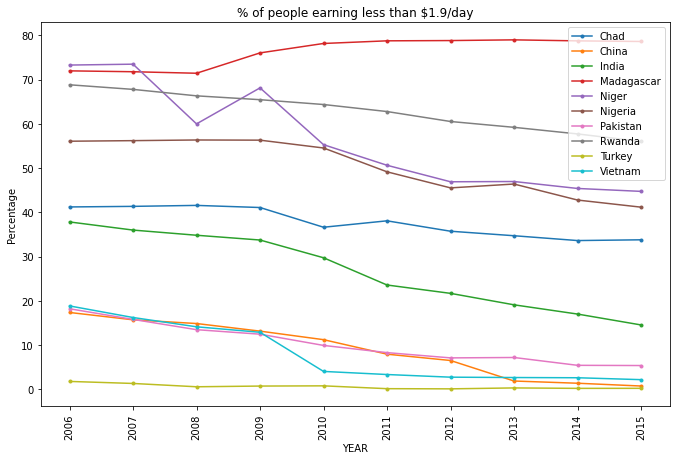

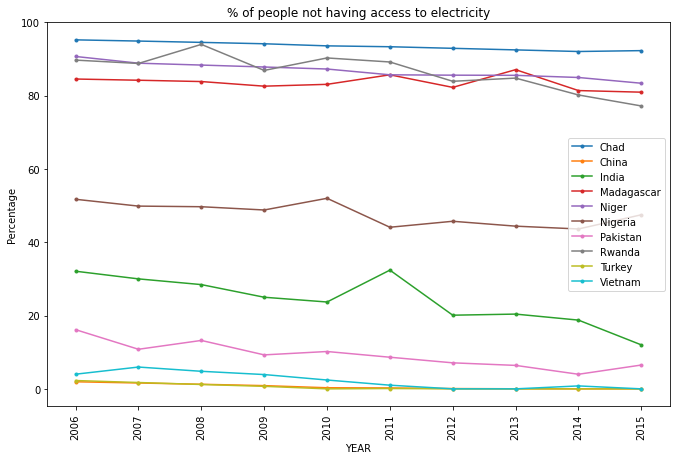

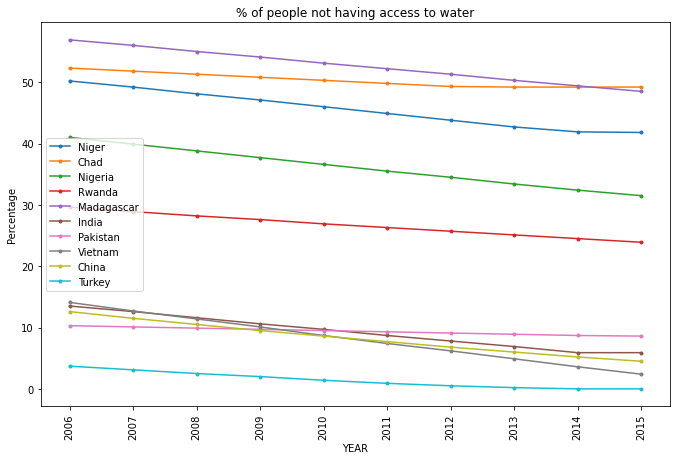

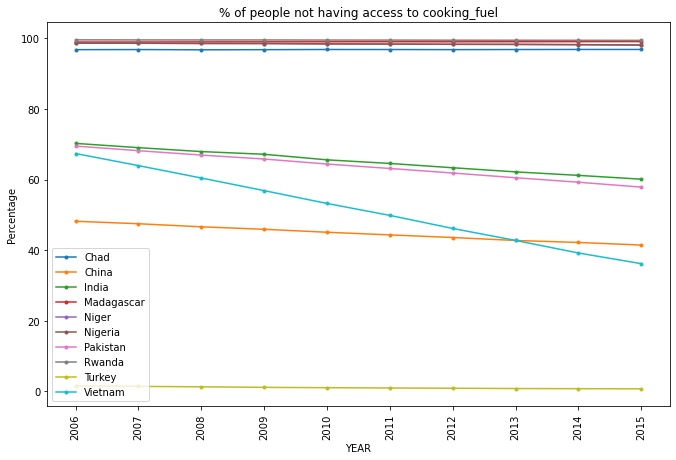

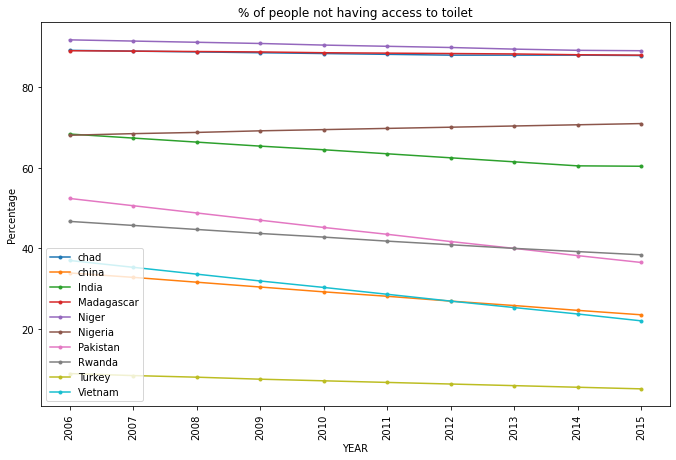

In [3]:
line_graph("./having_access/underonenine.csv", "% of people earning less than $1.9/day")
line_graph("./not_having_access/electricity.csv", "% of people not having access to electricity")
line_graph("./not_having_access/water.csv", "% of people not having access to water")
line_graph("./not_having_access/cooking_fuel.csv", "% of people not having access to cooking_fuel")
line_graph("./not_having_access/toilet.csv", "% of people not having access to toilet")

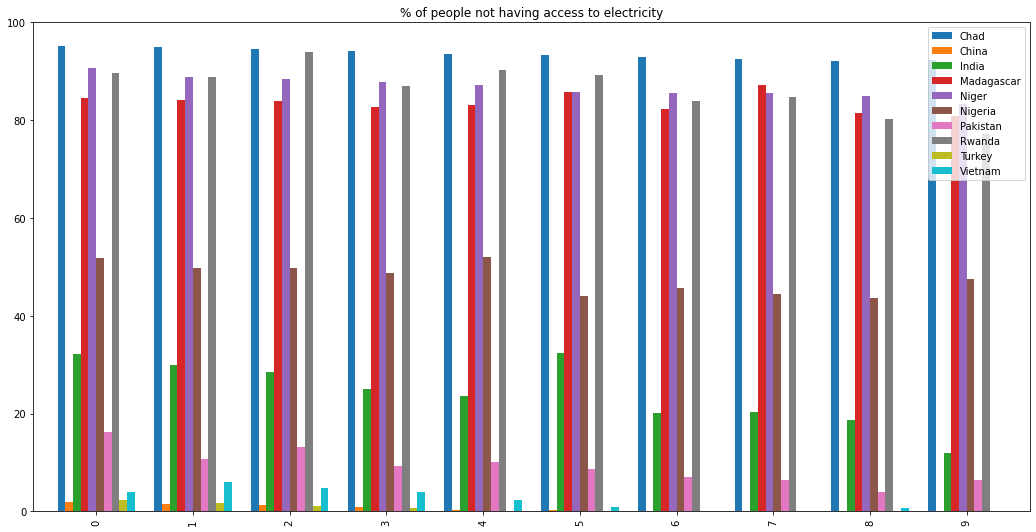

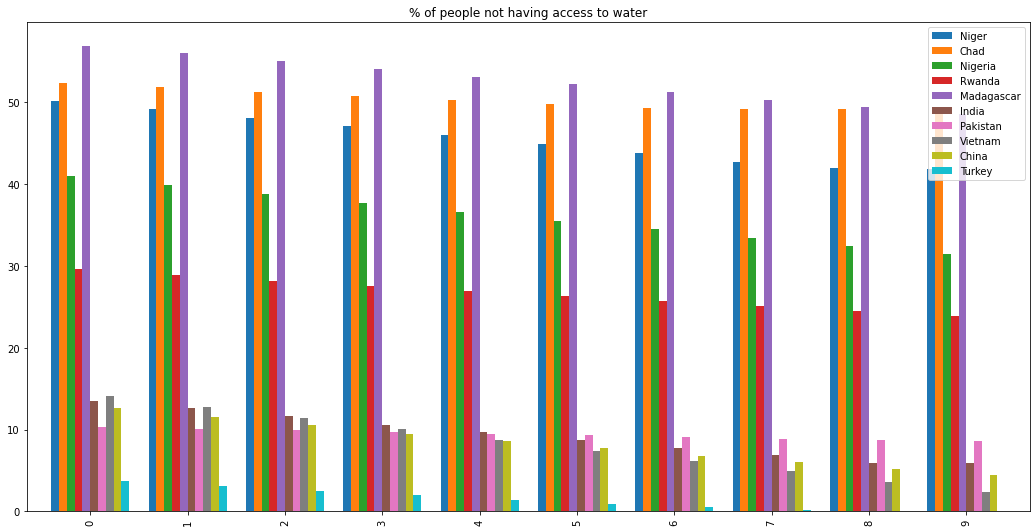

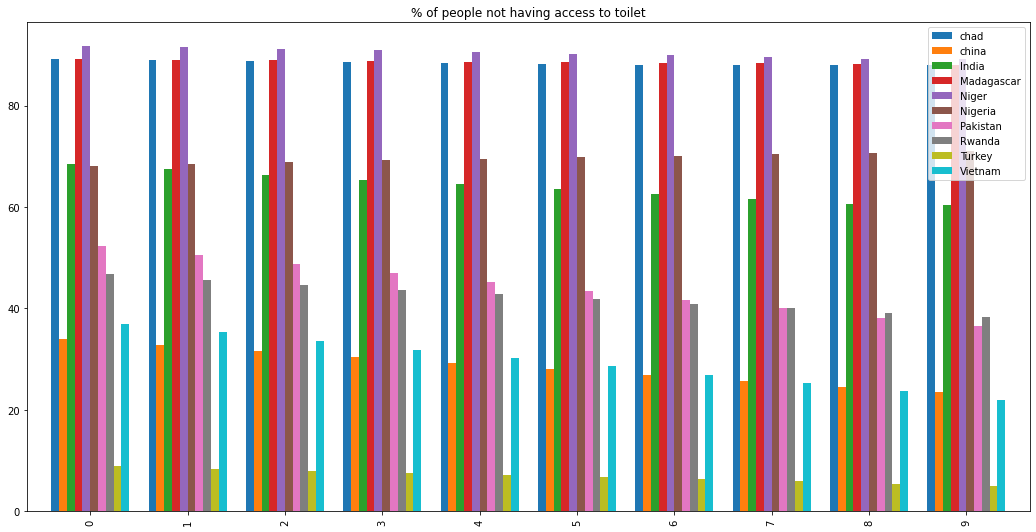

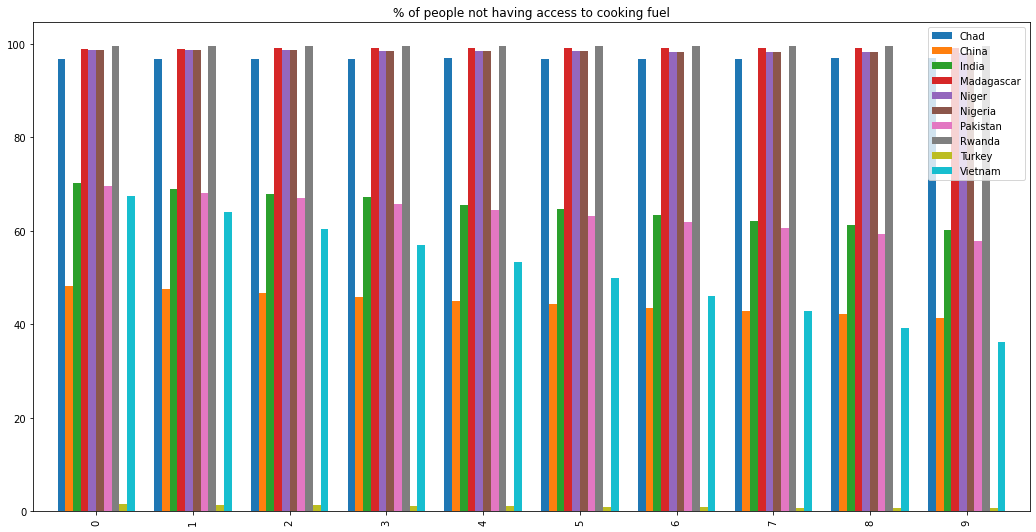

In [4]:
bar_graph("./not_having_access/electricity.csv", "% of people not having access to electricity")
bar_graph("./not_having_access/water.csv", "% of people not having access to water")
bar_graph("./not_having_access/toilet.csv", "% of people not having access to toilet")
bar_graph("./not_having_access/cooking_fuel.csv", "% of people not having access to cooking fuel")


In [5]:
def corelation2(filename):
    df1=pd.read_csv(filename)
    df2=pd.read_csv("./having_access/underonenine.csv")
    
    df1_india=df1['India ']
    df2_india=df2['India']
    df1_india.dropna()
    df2_india.dropna()
#     sum of values
    sum_india_df1=df1_india.sum()
    sum_india_df2=df2_india.sum()
# mean of all values
    mean_india_df1=df1_india.mean()
    mean_india_df2=df2_india.mean()
#     multiply two rows
    df12_multiply=df1_india*df2_india
    df12_sum=df12_multiply.sum()
# square of variable data
    df1_square=df1_india.pow(2)
    df2_square=df2_india.pow(2)
#     return df1_square
#     sum of values
    df1_square_sum=df1_square.sum()
    df2_square_sum=df2_square.sum()
    


In [55]:
def corr_graph(df1,df2,title):
    #graph code
    pd.options.mode.chained_assignment = None  # default='warn'
    # print(df1[["YEAR","India"]])
    df=df1[["YEAR","India"]]
    # d=df2_india.loc[:, "India"] =df1_india
    # print(d)
    df["People earning less than $1.9/day"]=(df2["India"])
    df2=df.drop("YEAR",axis=1)
    print(df2)
    plt.rcParams["figure.figsize"] = [9.50, 6.50]
    plt.rcParams["figure.autolayout"] = True
    df2.set_index('India').plot(marker=".")
    plt.xticks(df2["India"],df2["India"],rotation='vertical')
    plt.title(title)
    plt.xlabel("% of people don't have access to toilet")
    plt.ylabel('% of people earning less than $1.9 per day')
    plt.show()

In [143]:
def corelation(filename):
    df1=pd.read_csv(filename)
    df2=pd.read_csv("./having_access/underonenine.csv")
    
    df1_india=df1['India']
    df2_india=df2['India']
    corr=df2_india.corr(df1_india)
    nrows=len(df1.index)
    t_value=(corr*math.sqrt(nrows-2))/(math.sqrt(1-(corr**2)))
    # print(type(round(t_value,2)))  
    corr_graph(df1,df2,"% of people earning less than $1.9 vs % of people don't have acess to toilet")
    #return statement
    return round(t_value,2)

   India  People earning less than $1.9/day
0   68.4                              37.83
1   67.4                              35.99
2   66.4                              34.82
3   65.4                              33.74
4   64.5                              29.73
5   63.5                              23.57
6   62.5                              21.68
7   61.5                              19.09
8   60.5                              17.00
9   60.4                              14.54


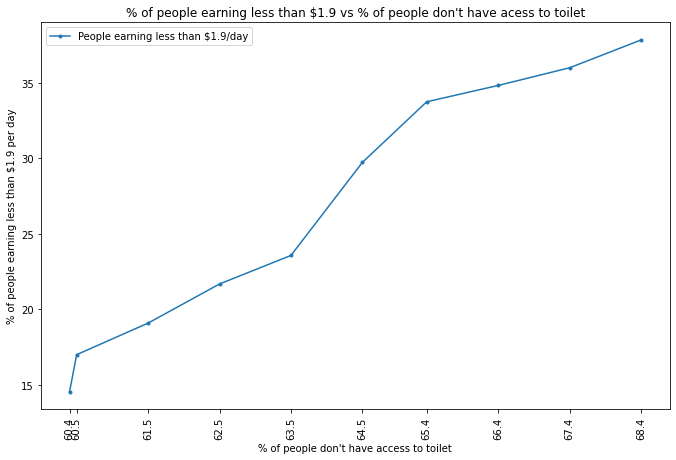

In [144]:
t_value=corelation("./not_having_access/toilet.csv")
# print(t_value)

In [ ]:
ta=1.86
print(type(ta))
if (t_value)>(ta):
    print("null hypothesis is rejectected and correlation is right tailed")
if (t_value)<(-ta):
    print("null hypothesis is rejectected and correlation is left tailed")
else:
    print(" null hypothsis is accepted")


<class 'float'>
null hypothesis is rejectected and correlation is right tailed
 null hypothsis is accepted


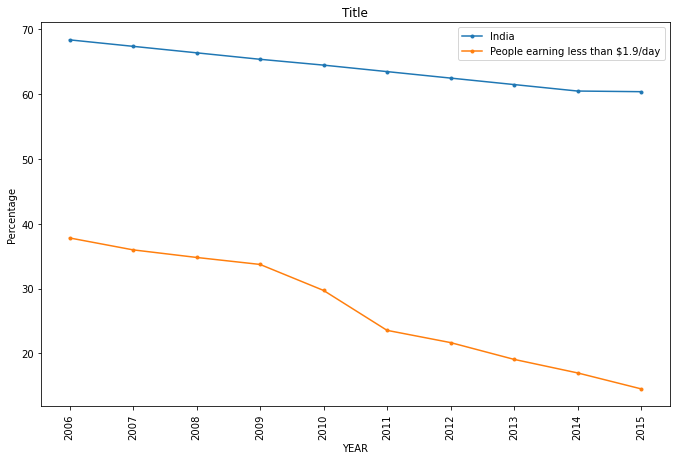

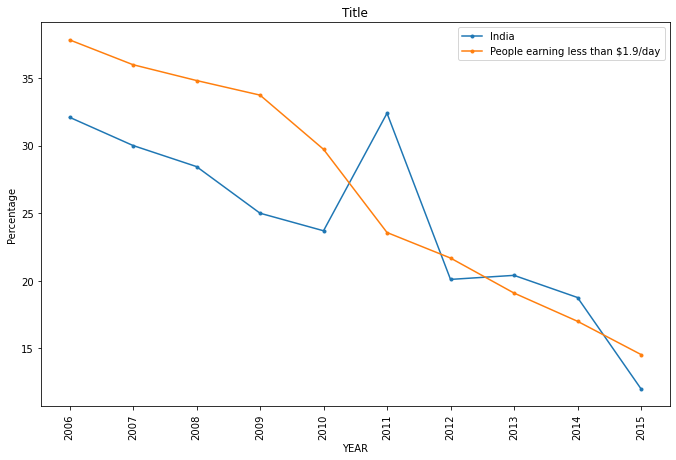

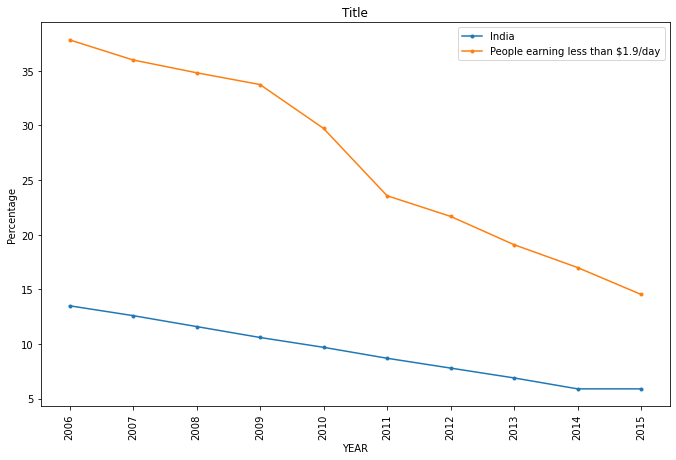

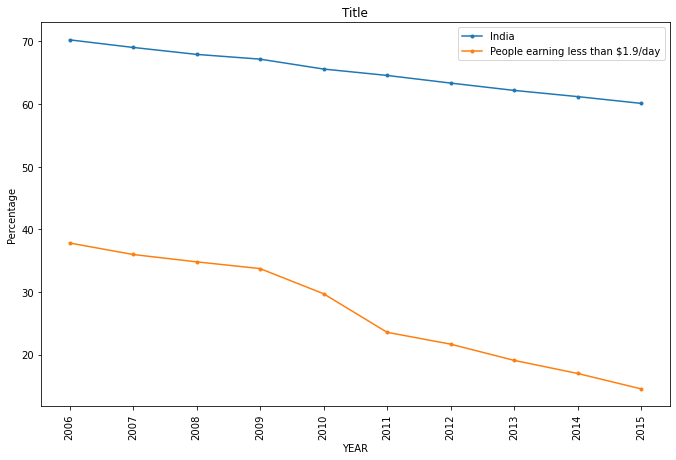

In [10]:
toilet_corr=corelation("./not_having_access/toilet.csv",)
electricity_corr=corelation("./not_having_access/electricity.csv")
water_corr=corelation("./not_having_access/water.csv")
cooking_fuel_corr=corelation("./not_having_access/cooking_fuel.csv")

In [4]:
def power_method(filename):
    df_lpg=pd.read_csv(filename)
    df_lpg2=df_lpg.drop('country',1)
    df2_lpg_array=df_lpg2.to_numpy()
    
    def normalize(x):
        fac = abs(x).max()
        x_n = x / x.max()
        return fac, x_n
    
    x = np.array([1, 1,1, 1,1, 1,1, 1,1, 1])

    for i in range(8):
        x = np.dot(df2_lpg_array, x)
        lambda_1, x = normalize(x)

    # eigen values and rounding off eigen vector
    value=x
    eigen_value=lambda_1
    eigen_vector=[]
    for i in value:
        value=str(i)
        value2=value.replace(',', '.')
        value3=float(value2)
        eigen_vector.append(value3)
    
    eigen_df=df_lpg['country']
    eigen_vector_2 = pd.Series(eigen_vector, name="Eigen Values")
    
    df = pd.merge(eigen_df, eigen_vector_2, right_index = True,
               left_index = True)
    
    df_sorted = df.sort_values(["Eigen Values", "country"], ascending=False)
    # df_sorted=pd.read_csv(filename)
    df_sorted=df_sorted.dropna()
    plt.rcParams["figure.figsize"] = [9.50, 6.50]
    plt.rcParams["figure.autolayout"] = True
    df_sorted.set_index('country').plot(marker=".")
    # plt.xticks(df_sorted["country"],df_sorted["country"],rotation='vertical')
    # plt.title(title)
    plt.ylabel('Rank')
    plt.show()
    print(df_sorted)
    # print('Eigenvalue:\n', lambda_1)
    # print('Eigenvector:\n', x)
    lambda_1, x




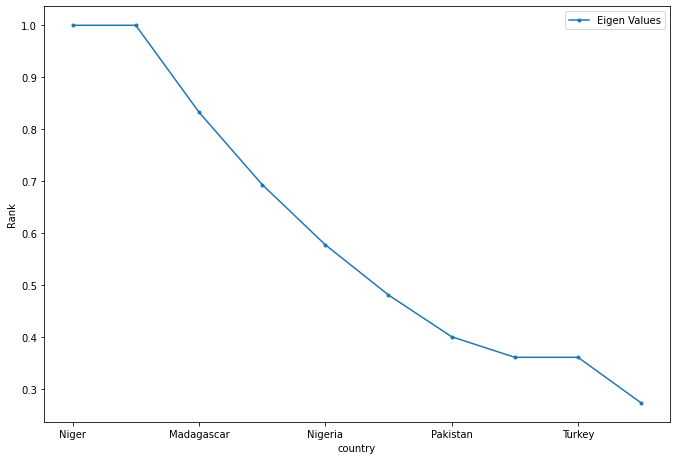

      country  Eigen Values
4       Niger      1.000000
0        Chad      1.000000
3  Madagascar      0.832796
7      Rwanda      0.693550
5     Nigeria      0.577588
2       India      0.481017
6    Pakistan      0.400593
9     Vietnam      0.361015
8      Turkey      0.361015
1       China      0.273254


In [7]:
power_method("./power_method/electricity.csv")          

In [8]:
def anova(filename):
    df = pd.read_csv(filename)
    df.drop('YEAR', axis=1)
    n = len(df.columns)
    k = df.size
    t_dic = {}
    for i in range(len(df)):
        s = 0
        for j in df.loc[i,:]:
            s += j
        t_dic[f't{i}'] = s
    T = sum(t_dic.values())
    t2 = sum([i ** 2 for i in t_dic.values()])
    SSTr = (t2/n) - (T ** 2/k)
    MSTr = SSTr/(k-1)
    SST = sum(df.pow(2).sum()) - (T ** 2/k)
    SSE = SST - SSTr
    MSE = SSE / (k * (n-1))
    f = MSE / MSTr
    fa=1.986
    print("Data:\n",df)
    print("SSTr:\n",SSTr)
    print("MSTr:\n",MSTr)
    print("SSE:\n",SSE)
    print("MSE:\n",MSE)
    
    if f>fa:
        return print("H0 is rejected")
    else:
        return print("H0 is accepted")   

In [9]:
anova("./having_access/underonenine.csv")

Data:
    YEAR   Chad  China  India  Madagascar  Niger  Nigeria  Pakistan  Rwanda  \
0  2006  41.22  17.36  37.83       71.99  73.30    56.08     18.20   68.84   
1  2007  41.35  15.70  35.99       71.79  73.50    56.21     15.79   67.80   
2  2008  41.57  14.86  34.82       71.45  60.00    56.36     13.47   66.34   
3  2009  41.09  13.14  33.74       76.05  68.14    56.32     12.45   65.47   
4  2010  36.63  11.21  29.73       78.18  55.30    54.55      9.91   64.38   
5  2011  38.08   7.93  23.57       78.78  50.64    49.16      8.28   62.79   
6  2012  35.73   6.50  21.68       78.84  46.91    45.53      7.09   60.54   
7  2013  34.71   1.86  19.09       79.00  46.97    46.40      7.18   59.22   
8  2014  33.62   1.36  17.00       78.77  45.40    42.78      5.41   57.73   
9  2015  33.79   0.73  14.54       78.63  44.74    41.17      5.36   56.02   

   Turkey  Vietnam  
0    1.77    18.84  
1    1.31    16.22  
2    0.56    14.12  
3    0.72    12.88  
4    0.77     4.03  
5    0.1

In [126]:
def regression(filename,title):
    data=pd.read_csv(filename)
    data=data.dropna()
    print(data)
    # data = pd.read_csv('data.csv')  # load data set
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    # print(Y_pred)
    print(Y)
    # print(Y[-1][0])
    # print(Y_pred[-1][0])
    # Y_pred[-1]=Y[-1]
    Y[-1]=Y_pred[-1][0]
    plt.scatter(X, Y)
    plt.xticks(data["YEAR"],data["YEAR"],rotation='vertical')
    plt.title(title)
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    plt.plot(X, Y, color='red')
    # plt.plot(X, Y_pred, color='green')
    return plt.show()
    # print(X)
    # print(Y)
    # print(Y_pred)

   YEAR   Chad  China  India  Madagascar  Niger  Nigeria  Pakistan  Rwanda  \
0  2006  95.24   1.93  32.10       84.55  90.70    51.73     16.15   89.71   
1  2007  94.91   1.60  30.01       84.22  88.87    49.87     10.80   88.80   
2  2008  94.55   1.25  28.45       83.86  88.36    49.70     13.21   94.00   
3  2009  94.17   0.88  25.00       82.60  87.83    48.81      9.27   86.90   
4  2010  93.60   0.30  23.70       83.10  87.28    52.00     10.19   90.30   
5  2011  93.36   0.25  32.40       85.70  85.70    44.10      8.63   89.20   
6  2012  92.93   0.08  20.10       82.27  85.60    45.73      7.10   83.93   
7  2013  92.50   0.02  20.40       87.10  85.56    44.40      6.40   84.80   
8  2014  92.06   0.00  18.76       81.40  84.97    43.63      3.98   80.20   
9  2015  92.30   0.00  12.00       80.96  83.40    47.50      6.50   77.20   

   Turkey  Vietnam  
0    2.27     4.00  
1    1.73     5.95  
2    1.19     4.79  
3    0.69     3.90  
4    0.00     2.41  
5    0.09     1

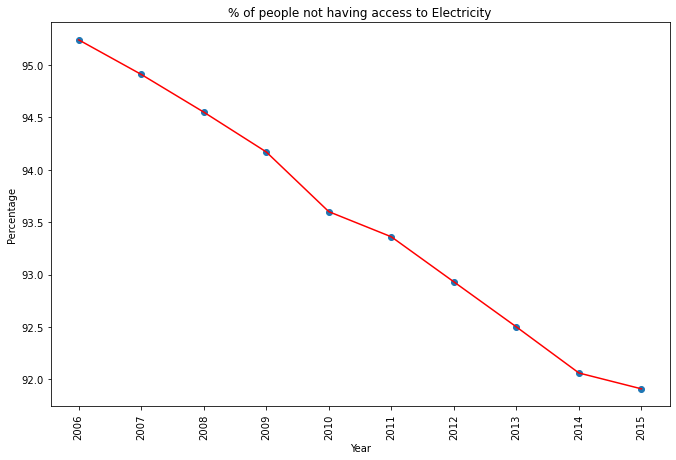

     YEAR  Chad   China  India  Madagascar  Niger  Nigeria  Pakistan  Rwanda  \
0  2006.0  4.76   98.07  67.90       15.45   9.30    48.27     83.85   10.29   
1  2007.0  5.09   98.40  69.99       15.78  11.13    50.13     89.20   11.20   
2  2008.0  5.45   98.75  71.55       16.14  11.64    50.30     86.79    6.00   
3  2009.0  5.83   99.12  75.00       17.40  12.17    51.19     90.73   13.10   
4  2010.0  6.40   99.70  76.30       16.90  12.72    48.00     89.81    9.70   
5  2011.0  6.64   99.75  67.60       14.30  14.30    55.90     91.37   10.80   
6  2012.0  7.07   99.92  79.90       17.73  14.40    54.27     92.90   16.07   
7  2013.0  7.50   99.98  79.60       12.90  14.44    55.60     93.60   15.20   
8  2014.0  7.94  100.00  81.24       18.60  15.03    56.37     96.02   19.80   
9  2015.0  7.70  100.00  88.00       19.04  16.60    52.50     93.50   22.80   

   Turkey  Vietnam  
0   97.73    96.00  
1   98.27    94.05  
2   98.81    95.21  
3   99.31    96.10  
4  100.00    9

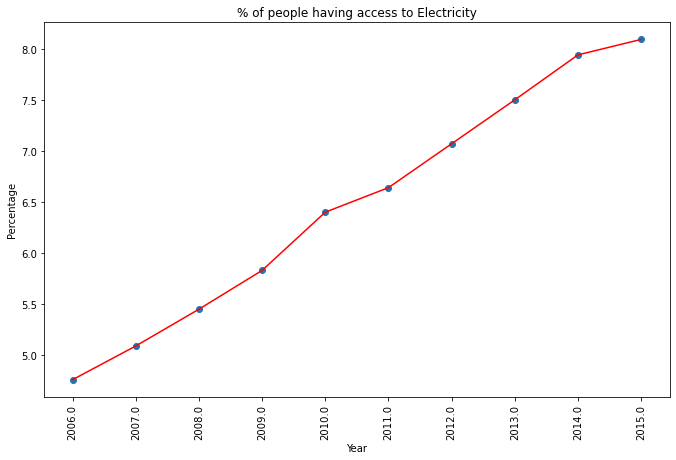

In [127]:
regression("./not_having_access/electricity.csv", "% of people not having access to Electricity")
regression("./having_access/electricity.csv", "% of people having access to Electricity")
# s=pd.read_csv("./not_having_access/electricity.csv")
# s['India']

In [5]:
def hyptothesis_on_two(file_underonenine,file2):
    df_underonenine=pd.read_csv(file_underonenine)
    df2=pd.read_csv(file2)
    
    df_underonenine_india=df_underonenine["India"]
    df2_india=df2[["YEAR","India"]]
    df2_india["India"]=df_underonenine_india
    # print(df_underonenine_india)
    # print(df2_india)

In [6]:
hyptothesis_on_two("./having_access/underonenine.csv", "./not_having_access/water.csv")

<ipython-input-5-ee8fc8e674a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_india["India"]=df_underonenine_india


In [17]:
def varEq(filename, x, y):
    df = pd.read_csv(filename)
    df=df.drop([10,11])
    n = len(df)
    sx = sum(df[x])
    mx = df[x].mean()
    sy = sum(df[y])
    my = df[y].mean()
    sxy = sum(df[x] * df[y])
    sx2 = sum([i ** 2 for i in df[x]])
    df=df.drop(['xy','x2','y2'], axis=1)
    print(df)
    # print("Length",n)
    # print("sum of all elements in x column",sx)
    # print("Mean",mx)
    # print("sy",sy)
    # print("my",my)
    # print("sxy",sxy)
    # print("sx2",sx2)

    b = ((n * sxy) - (sx * sy)) / ((n * sx2) - sx ** 2)
    a = my - b * mx

    return print(f"y = {round(a, 2)} + {round(b, 2)}x")

In [18]:
varEq('./equation/toilet.csv', 'India(1.9)', 'India(toilet)')

   year  India(toilet)  India(1.9)
0  2006           68.4       37.83
1  2007           67.4       35.99
2  2008           66.4       34.82
3  2009           65.4       33.74
4  2010           64.5       29.73
5  2011           63.5       23.57
6  2012           62.5       21.68
7  2013           61.5       19.09
8  2014           60.5       17.00
9  2015           60.4       14.54
y = 55.36 + 0.32x
